<a id="Introduction"></a> 


<center>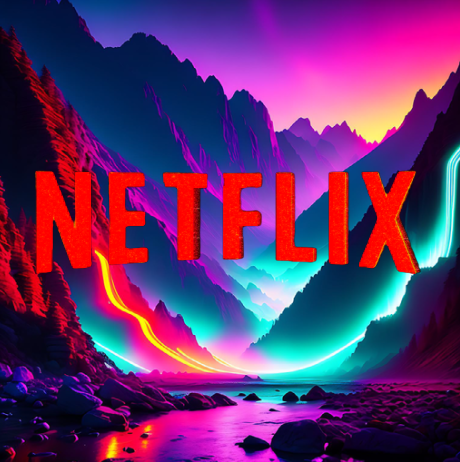<center>


<center><h1>🚩 Exploring Netflix Data 🚩</h1></center>
    
# Introduction
Are you curious about the content available on Netflix? Have you ever wondered which countries produce the most content, or which genres are the most popular?

In this project, we'll be exploring a dataset of Netflix content to answer these questions and more. Using various data analysis techniques, we'll be able to gain insights into the world of Netflix and the content available on the platform.

> **🟢 Goal**: The goal of this notebook is to analyze the Netflix dataset and uncover interesting patterns and trends in the content available on the platform. We will explore factors such as country of production, genre, release year, and more to gain insights into the world of Netflix.    
    

**💡 Helpful Notes**:
    
* we have a `.csv` dataset - `/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv` with 10 columns and 8790 rows
* 100 episodes * 3 notebooks presented per episode = 300 total observations.
* We have 8790 Shows.

* We have 2 different show types.

* There are 4528 directors contributed for those shows.

* We have 86 different country.

* We have 14 different rating types.

* We have 220 show durations.


    
<img src="https://giphy.com/clips/BlownAway-netflix-blown-away-yMc3kXcwVh6utp8hkm">

    

# 📚 Libraries 

Notebook Color Scheme:


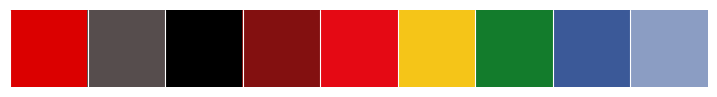

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from itertools import cycle
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots


# set style 


pio.templates.default = "plotly_dark"
plt.style.use('seaborn-darkgrid')
sns.set_style("darkgrid")

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'


# Color palette

my_colors = ["#db0000", "#564d4d", "#000000", "#831010"]
new_colors = ["#e50914", "#f5c518", "#137c2c", "#3b5998", "#8b9dc3"]
my_colors += new_colors

print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [2]:
# Run this to enable CSS stype
# WARNING: run it in a separate cell, not alongside other code blocks too
from IPython.core.display import HTML
def css_styling():
    styles = open("/kaggle/input/alerts-21/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

# 📥 Importing and Wrangling data types 

In [3]:
# Read in the dataframe
df = pd.read_csv("/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")

df.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [4]:
print(clr.S+"The dataset has a size of:"+clr.E, df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df.isna().sum()

The dataset has a size of: (8790, 10) 

Missing values:


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
# convert selected columns to string data type
df = df.astype({'title': 'string', 'director': 'string', 'country': 'string',
                'rating': 'string', 'listed_in': 'string'})

# convert date_added to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'], format = '%m/%d/%Y')

# print data types after converting
print(df.dtypes)

show_id                 object
type                    object
title                   string
director                string
country                 string
date_added      datetime64[ns]
release_year             int64
rating                  string
duration                object
listed_in               string
dtype: object


In [8]:
columns = df.columns

for col in columns:
    
    print(f"We have {df[col].nunique()} {col}.\n")

We have 8790 show_id.

We have 2 type.

We have 8787 title.

We have 4528 director.

We have 86 country.

We have 1713 date_added.

We have 74 release_year.

We have 14 rating.

We have 220 duration.

We have 513 listed_in.



# Exploring different features 

[Text(0.5, 1.0, 'Top 9 Duration Values'),
 Text(0.5, 0, 'Duration'),
 Text(0, 0.5, 'Count')]

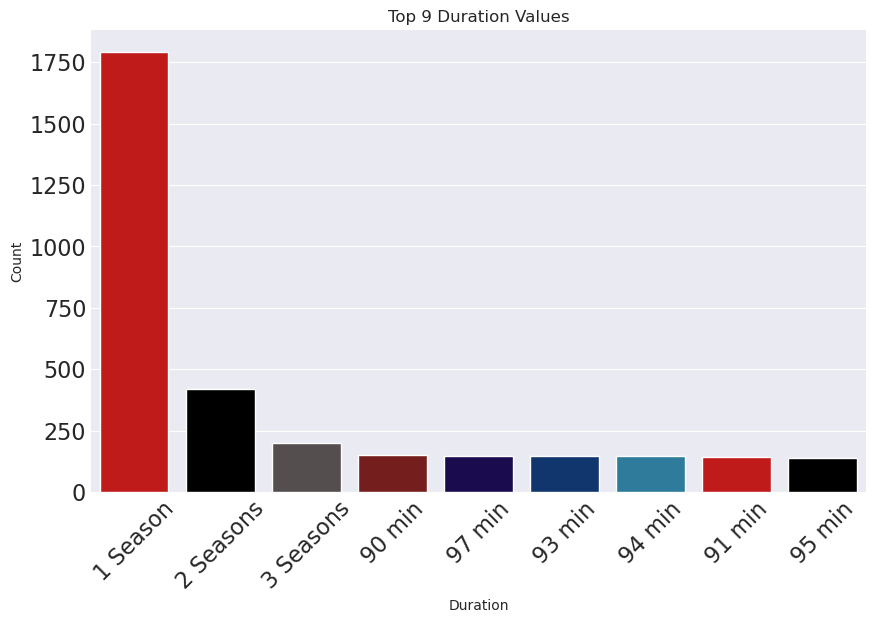

In [9]:
# Get the value counts of the duration column
duration_counts = df['duration'].value_counts()

# Get the top 9 values
top_9_values = duration_counts[:9]

# Create a barplot for the top 9 values
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_9_values.index, y=top_9_values.values, ax=ax, palette=my_colors)
plt.xticks(rotation=45)
ax.set(title='Top 9 Duration Values', xlabel='Duration', ylabel='Count')

In [10]:
import plotly.graph_objs as go

# Create a trace for the bar chart
trace = go.Bar(x=top_9_values.index, y=top_9_values.values, 
               marker=dict(color=my_colors))

# Set the layout for the chart
layout = go.Layout(title='Top 9 Duration Values', xaxis=dict(title='Duration'), 
                   yaxis=dict(title='Count'), height=500, width=800)

# Create the figure and plot it
fig = go.Figure(data=[trace], layout=layout)
fig.show()


# What is the distribution of movie and TV show releases over time?



In [23]:
type_mov = df['type'].value_counts().reset_index()
fig = px.pie(type_mov, values='type', names='index')
fig.update_traces(marker = dict(colors=my_colors))
fig.show()

# What are the most popular directors? 

In [97]:
director_counts = df['director'].value_counts().drop("Not Given").reset_index()[:5]
director_counts.columns = ['director', 'count']
director_counts.head()

,director,count
0,Rajiv Chilaka,20
1,Alastair Fothergill,18
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16


In [100]:
fig = px.bar(director_counts, x='count', y='director', color='director', orientation='h', color_discrete_sequence=my_colors)

fig.update_layout(title='Top 5 Directors by Number of Titles',
                  xaxis_title='Number of Titles',
                  yaxis_title='Director')

fig.show()

# Which countries produce the most movies and TV shows?

In [ ]:
plt.figure(figsize=(12,6))
most_pop_cou = df['country'].value_counts().drop('Not Given').head()
sns.barplot(x=most_pop_cou.index, y =most_pop_cou.values,saturation = 1,palette=my_colors)
plt.title("Most Popular countries", fontsize = 14, fontweight = 'heavy')
plt.show()

In [ ]:
df.columns

In [ ]:
grouped = pd.DataFrame(df.groupby(['release_year', 'type'])['type'].count())
grouped.rename(columns={"type": "type_count"}, inplace=True)
grouped.reset_index()

# Normalizing listed_in column 

In [ ]:
genre_dummies = df['listed_in'].str.get_dummies(', ')
genre_dummies.columns = ['genre_' + col for col in genre_dummies.columns]
df_norm = pd.concat([df, genre_dummies], axis=1)
df_norm.head()

In [ ]:
# plot the frequency of each genre using Matplotlib
genre_counts = genre_dummies.sum().sort_values(ascending=False)[:6]
fig, ax = plt.subplots()
ax.barh(genre_counts.index, genre_counts.values)
ax.set_title('Frequencies of Genres in Dataset')
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
plt.show()

In [ ]:
# plot the frequency of each genre using Plotly
genre_counts = genre_dummies.sum().sort_values().reset_index()
genre_counts.columns = ['genre', 'count']
fig = px.bar(genre_counts, x='count', y='genre', orientation='h')
fig.update_layout(title='Frequencies of Genres in Dataset')
fig.show()

In [ ]:
df.head()

In [ ]:
# sort the genre counts in descending order
genre_counts = genre_dummies.sum().sort_values(ascending=False)


In [ ]:
# sort the genre counts in descending order
genre_counts = genre_dummies.sum().sort_values(ascending=False)

# get the top genre
top_genre = genre_counts.index[0]

# create a custom color sequence where the color of the top genre is different
color_sequence = ['rgb(255, 0, 0)' if genre == top_genre else 'rgb(255, 255, 255)' for genre in genre_counts.index]

# create the Plotly bar chart with the custom color sequence
fig = px.bar(x=genre_counts.values, y=genre_counts.index, orientation='h', color=color_sequence)

# update the layout
fig.update_layout(title='Frequencies of Genres in Dataset', xaxis_title='Frequency', yaxis_title='Genre', showlegend=False)

# show the plot
fig.show()


# Number of Content Produced by Month and Type

In [94]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [95]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,rating_cat,rating_num,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90.0,Documentaries,PG-13,9,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,6,2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",TV-MA,6,2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91.0,"Children & Family Movies, Comedies",TV-PG,4,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",TV-MA,6,2021,9,24


In [96]:
# Group the data by 'type' and 'month_added' and count the number of entries in each group
grouped_data = pd.DataFrame(df.groupby(['type', 'month_added'])['month_added'].count())

# Rename the count column to 'type_count'
grouped_data.rename(columns={"month_added": "type_count"}, inplace=True)

# Reset the index of the resulting dataframe
grouped_data.reset_index(inplace=True)

# Use Plotly Express to create a line plot of the grouped data
fig = px.line(grouped_data, x='month_added', y='type_count', color='type')

# Customize the appearance of the chart
fig.update_traces(line=dict(width=3))
fig.update_layout(title='Number of Content Produced by Month and Type',
                  xaxis_title='Month Added',
                  yaxis_title='Number of Titles Added')

# Show the chart
fig.show()


# Number of Content Produced per year 

In [47]:
# Group the data by year and count the number of titles added
year_counts = df.groupby('release_year').size().reset_index(name='count')

# Create the bar chart using Plotly
fig = px.bar(year_counts, x='release_year', y='count', color='release_year')

# Customize the appearance of the chart
fig.update_traces(marker=dict(color=my_colors[3]))
fig.update_layout(title='Number of Content Produced per Year',
                  xaxis_title='Year',
                  yaxis_title='Count',
                  xaxis_tickangle=-45)

# Show the chart
fig.show()


# Trend of the average rating overtime 



<div class="alert simple-alert">
  <p>💡<b>Note</b>: Based on the plot, it seems that the average rating of movies and TV shows was higher in the past, particularly in the late 1960s. This may be due to various reasons, such as the fact that fewer movies and TV shows were being produced at the time, and that the competition for viewership was lower. It's also possible that the tastes and preferences of audiences have changed over time, leading to a decrease in average ratings for newer movies and TV shows. However, more analysis would be needed to confirm these hypotheses.</p>
</div>

In [52]:
ratings = {'TV-Y': 1, 'TV-Y7': 2, 'TV-G': 3, 'TV-PG': 4, 'TV-14': 5, 'TV-MA': 6,
           'G': 7, 'PG': 8, 'PG-13': 9, 'R': 10, 'NC-17': 11, 'NR': 12, 'TV-Y7-FV': 13, 'UR': 14}

df['rating_num'] = df['rating'].map(ratings)


In [55]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'rating_cat',
       'rating_num'],
      dtype='object')

In [56]:
# Group the data by release year and calculate the mean rating for each year
yearly_ratings = df.groupby('release_year')['rating_num'].mean().reset_index()

# Create a line chart using Plotly
fig = px.line(yearly_ratings, x='release_year', y='rating_num')

# Customize the appearance of the chart
fig.update_traces(line=dict(width=3, color=my_colors[0]))
fig.update_layout(title='Average Rating Over Time',
                  xaxis_title='Year',
                  yaxis_title='Average Rating')

# Show the chart
fig.show()

# The frequency of genres for each rating category.



In [57]:
# Create a pivot table with the count of each genre for each rating category
genre_rating_counts = pd.crosstab(df['listed_in'].str.split(', ', expand=True)[0], df['rating'])

# Create a stacked bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='PG-13', x=genre_rating_counts.index, y=genre_rating_counts['PG-13']),
    go.Bar(name='TV-MA', x=genre_rating_counts.index, y=genre_rating_counts['TV-MA']),
    go.Bar(name='TV-PG', x=genre_rating_counts.index, y=genre_rating_counts['TV-PG']),
    go.Bar(name='TV-14', x=genre_rating_counts.index, y=genre_rating_counts['TV-14']),
    go.Bar(name='TV-Y7', x=genre_rating_counts.index, y=genre_rating_counts['TV-Y7']),
    go.Bar(name='TV-Y', x=genre_rating_counts.index, y=genre_rating_counts['TV-Y']),
    go.Bar(name='PG', x=genre_rating_counts.index, y=genre_rating_counts['PG']),
    go.Bar(name='TV-G', x=genre_rating_counts.index, y=genre_rating_counts['TV-G']),
    go.Bar(name='R', x=genre_rating_counts.index, y=genre_rating_counts['R']),
    go.Bar(name='G', x=genre_rating_counts.index, y=genre_rating_counts['G']),
    go.Bar(name='NC-17', x=genre_rating_counts.index, y=genre_rating_counts['NC-17']),
    go.Bar(name='NR', x=genre_rating_counts.index, y=genre_rating_counts['NR']),
    go.Bar(name='TV-Y7-FV', x=genre_rating_counts.index, y=genre_rating_counts['TV-Y7-FV']),
    go.Bar(name='UR', x=genre_rating_counts.index, y=genre_rating_counts['UR'])
])

# Customize the appearance of the chart
fig.update_layout(title='Frequency of Genres for Each Rating Category',
                  xaxis_title='Genres',
                  yaxis_title='Frequency',
                  barmode='stack')

# Show the chart
fig.show()


# The relationship between duration and rating.

In [59]:
fig = px.scatter(df, x='duration', y='rating_num', color='rating_cat', hover_name='title')
fig.update_layout(title='Duration vs Rating',
                  xaxis_title='Duration (minutes)',
                  yaxis_title='Rating (numerical)')

fig.update_layout(
    title='Duration vs Rating',
    xaxis_title='Duration (minutes)',
    yaxis_title='Rating',
    xaxis_tickangle=45
)

fig.show()

# Average duration of content for each director

<div class="alert simple-alert">
  <p>💡<b>Note</b>: To better understand the relationship between directors and the duration of their titles, we first converted the duration of TV Shows from "1 Season" or "2 Seasons" to minutes, assuming an average of 10 episodes per season and an average length of 30 minutes per episode. We also removed the "min" from the duration values and converted them to numeric values.</p>
</div>

<div class="alert danger-alert">
  <p>💡<b>Note</b>: To visualize this relationship, we created a line chart using Plotly. The chart shows the top 10 directors with the longest average duration of titles, sorted in descending order by duration. </p>
</div>

In [76]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,rating_cat,rating_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90.0,Documentaries,PG-13,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",TV-MA,6
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",TV-MA,6
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91.0,"Children & Family Movies, Comedies",TV-PG,4
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",TV-MA,6


In [67]:
# Define the average number of episodes per season and the average length per episode
episodes_per_season = 10
length_per_episode = 30

# Convert the duration of TV Shows from "1 Season" or "2 Seasons" to minutes
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration'].apply(lambda x: int(x.split(' ')[0]) * episodes_per_season * length_per_episode if 'Season' in x else x)


In [69]:
# Remove "min" from duration values
df['duration'] = df['duration'].str.replace('min', '')

# Convert duration to numeric values
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Check the updated duration column
print(df['duration'].value_counts())


90.0     152
93.0     146
94.0     146
97.0     146
91.0     144
        ... 
208.0      1
5.0        1
16.0       1
186.0      1
312.0      1
Name: duration, Length: 205, dtype: int64


In [90]:
director_durations = df.groupby('director')['duration'].mean().sort_values(ascending=False).reset_index()[:10]
director_durations

,director,duration
0,Houssam El-Din Mustafa,253.000000
1,Samir Al Asfory,237.000000
2,Fouad El-Mohandes,233.000000
3,Fouad Al Shatti,204.000000
4,Hussein Kamal,201.500000
5,David Lean,200.000000
6,Sergio Leone,197.500000
7,Bassam Kurdali,196.000000
8,Karan Johar,195.333333
9,Hassan AbdulSalam,195.000000


In [91]:
fig = px.line(director_durations, x='director', y='duration')

fig.update_layout(title='Average Duration of Titles by Director and Rating Category',
                  xaxis_title='Director',
                  yaxis_title='Duration (min)')

fig.show()


# Which countries have the most titles available on Netflix? 

In [106]:
# Get the top 10 countries with the most titles
top_countries = df['country'].value_counts().drop("Not Given").reset_index().head(10)
top_countries.columns = ['country', 'count']

# Create a bar plot of the top countries
fig = px.bar(top_countries, x='country', y='count', color='country', color_discrete_sequence=my_colors)

# Update the layout of the plot
fig.update_layout(title='Top 10 Countries with the Most Titles on Netflix',
                  xaxis_title='Country',
                  yaxis_title='Count')

# Show the plot
fig.show()
